<a href="https://colab.research.google.com/github/Mmarlo5/psychic-doodle/blob/main/Copy_of_Problem_Set_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project is focused on looking to see if states where the number of abortions is highest resulted in more restrictions on abortion after the reversal of Roe v. Wade.

The first dataset comes from https://www.guttmacher.org/united-states/abortion. This dataset is complex and contains data on abortion by state.

The second dataset comes from https://lawatlas.org/datasets/abortion-laws This dataset is complex and contains data on abortion by state such as the type of restrictions.

I added another dataset from the CDC - https://www.cdc.gov/mmwr/volumes/71/ss/ss7110a1.htm#T1_down.

My research question is: Are states that have the highest frequency of abortions also the states that had the strictest restrictions after the reversal of Roe v. Wade.

I hypothesis that the states with the highest number of occurences (abortions) are the same states with the tightest restrictions after the reversal of Roe v. Wade in 2022.

For this project, I used certain variables since they best represented the research question. I used State level data to first look at the number of abortions by state and added additional occurrence level data. Then I collected data on the U.S states that put abortion bans into place after the reversal of Roe v. Wade. My thinking was that states were reacting to abortion in an attempt to stop a large proportion of women from having abortions since the rate increased. What I found was that states with the lowest occurrence of abortions were the states that had abortion bans in place after the reversal of Roe v. Wade.

As the project continutes, I will be adding more data and additional graphs. The new dataset comes from pew research and contains data on the changes in opinions of abortion by year. https://news.gallup.com/poll/1576/abortion.aspx

For Problem Set 5, I also added more demographic data on abortion. https://news.gallup.com/poll/244709/pro-choice-pro-life-2018-demographic-tables.aspx

For Problem Set 5, I also added more data from here: https://www.guttmacher.org/public-use-datasets

Future research should include religion into the project since religion is a large driver of opinions on abortion.

#aok: do lit review in terms of images ie:
https://www.google.com/search?q=abortions+visualization&rlz=1CAKDZI_enUS997US997&sxsrf=APwXEdfZOCY8wQvza50o0djX3zJaITDzNg:1680265625853&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj6k4eelYb-AhV5jYkEHXWADaoQ0pQJegQIAxAC&biw=1707&bih=842&dpr=1.13
do sth similar; AND cross check your findings with those of others

and search for python notebooks and code for your specific project:

https://www.kaggle.com/code/mpwolke/abortion-statistics/notebook
https://www.kaggle.com/code/mpwolke/abortion-eda-jovian/notebook
https://heigit.org/access-to-safe-abortion-in-germany/
https://digital.kenyon.edu/cgi/viewcontent.cgi?article=1046&context=dh_iphs_prog

last but not least do not keep your vis in a drawer! make it public! go present it locally, eg other classes, ru research seminars, local universities; and go more broadly conferences specializing in it, talk to media, post online, and finally publish in scientific journal--this is the only way to take it to the next level--to connect with the stakeholders and researchers in your area and get comments from them and improve it and take it to the next level

# Packages

In [21]:
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib

from google.colab import files

import webbrowser
import folium as f
from folium.plugins import MarkerCluster, HeatMap


! pip install geopandas
import geopandas as gpd

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly.express as px

# Dataset-AbortionCen

In [ ]:
abortionCen = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Rate%20of%20US%20abortions-Table%201.csv")
abortionCen.head()

,Unnamed: 0,Abortion rate among women aged 15–44,Unnamed: 2,Unnamed: 3,% change in abortion rate,Unnamed: 5,Unnamed: 6
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [ ]:
abortionCen = abortionCen.rename(columns={'Unnamed: 0': 'State', 'Abortion rate among women aged 15–44': 'Abortion rate aged 15-44 (2017)', 'Unnamed: 2': 'Abortion rate among women aged 15-44 (2019)', 'Unnamed: 3': 'Abortion rate among women aged 15-44 (2020)','Unnamed: 5': '% change in abortion rate (2017-2019)','Unnamed: 6': '% change in abortion rate (2019-2020)' })
abortionCen.head()
#Renamed all variables for better understanding


,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [ ]:
abortionCen.replace(np.nan,"None")
abortionCen.head()
#Everything was replaced correctly

,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,None,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,None,None,None,None,None,None,None
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%
5,Maine,8.8,9.0,10.1,2%,12%,15%
6,Massachusetts,13.5,13.6,12.2,1%,-10%,-9%
7,New Hampshire,9.2,8.5,8.3,-7%,-2%,-9%
8,New Jersey,28.0,28.8,29.2,3%,1%,4%
9,New York,26.3,30.2,28.8,15%,-5%,9%


,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [ ]:
abortionCen = abortionCen.groupby('State')['Abortion rate among women aged 15-44 (2020)'].sum().reset_index()
abortionCen.head()

,State,Abortion rate among women aged 15-44 (2020)
0,Alabama,6.0
1,Alaska,8.6
2,Arizona,9.3
3,Arkansas,5.6
4,California,19.2


# Dataset-Abortionban

In [ ]:
abortionban=pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Statistical%20Data-Table%201.csv")
abortionban.head()
#This dataset lists the same country multiple times because of the effective data of the restrictions by state

,State,Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,Bans_gest_Fetal heartbeat detected,...,Methods_Prohibit,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe
0,Alabama,12/1/18,10/28/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
1,Alabama,10/29/19,11/14/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
2,Alabama,11/15/19,6/23/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
3,Alabama,6/24/22,11/1/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
4,Alaska,12/1/18,11/1/22,1,1,1,0,0,.,.,...,1,1,0,0,0,0,0,1,0,0


In [ ]:
abortionban.replace(np.nan,"None")

,State,Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,Bans_gest_Fetal heartbeat detected,...,Methods_Prohibit,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe
0,Alabama,12/1/18,10/28/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
1,Alabama,10/29/19,11/14/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
2,Alabama,11/15/19,6/23/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
3,Alabama,6/24/22,11/1/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
4,Alaska,12/1/18,11/1/22,1,1,1,0,0,.,.,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Wyoming,7/1/21,3/14/22,1,0,.,.,1,0,0,...,0,.,.,.,.,.,.,.,0,0
237,Wyoming,3/15/22,7/26/22,1,0,.,.,1,0,0,...,0,.,.,.,.,.,.,.,0,0
238,Wyoming,7/27/22,7/27/22,1,1,1,0,1,1,0,...,0,.,.,.,.,.,.,.,1,0
239,Wyoming,7/28/22,8/9/22,1,1,1,0,1,1,0,...,0,.,.,.,.,.,.,.,1,0


In [ ]:
abortionban.rename(columns={
    'State/Territory': 'State',
    'Bans and/or Restrictions': 'Bans_Prohibit',
    'Limited Law': 'Limited_Law',
    'Limited Court Access': 'Limited_Court',
    'Limited AG Access': 'Limited_AG',
    'Prohibit Requirement': 'Prohibit_Req'
}, inplace=True)
abortionban.head()

,State,Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,Bans_gest_Fetal heartbeat detected,...,Methods_Prohibit,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe
0,Alabama,12/1/18,10/28/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
1,Alabama,10/29/19,11/14/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
2,Alabama,11/15/19,6/23/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
3,Alabama,6/24/22,11/1/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
4,Alaska,12/1/18,11/1/22,1,1,1,0,0,.,.,...,1,1,0,0,0,0,0,1,0,0


In [ ]:
abortionmerge = pd.merge(abortionCen, abortionban, how='outer', on=['State'],indicator=True)
abortionmerge
#Changed None back to NaN - Fix again!
#aok: this is important data: laws! visualize this against actual abortions and opinions about abortions
#say a bar chart, where you have separate bars by 1 and 0 on prohibition, limited law, court, etc
#and each bar's height is say abortion rate (actual) and opinions: good thing, bad thing etc

,State,Abortion rate among women aged 15-44 (2020),Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,...,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe,_merge
0,Alabama,6.0,12/1/18,10/28/19,1.0,1,1,0,1,0,...,1,1,0,1,1,0,0,0,1,both
1,Alabama,6.0,10/29/19,11/14/19,1.0,1,1,0,1,0,...,1,1,0,1,1,0,0,0,1,both
2,Alabama,6.0,11/15/19,6/23/22,1.0,1,1,0,1,1,...,1,1,0,1,1,0,0,0,1,both
3,Alabama,6.0,6/24/22,11/1/22,1.0,1,1,0,1,1,...,1,1,0,1,1,0,0,0,1,both
4,Alaska,8.6,12/1/18,11/1/22,1.0,1,1,0,0,.,...,1,0,0,0,0,0,1,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Wyoming,0.9,7/1/21,3/14/22,1.0,0,.,.,1,0,...,.,.,.,.,.,.,.,0,0,both
242,Wyoming,0.9,3/15/22,7/26/22,1.0,0,.,.,1,0,...,.,.,.,.,.,.,.,0,0,both
243,Wyoming,0.9,7/27/22,7/27/22,1.0,1,1,0,1,1,...,.,.,.,.,.,.,.,1,0,both
244,Wyoming,0.9,7/28/22,8/9/22,1.0,1,1,0,1,1,...,.,.,.,.,.,.,.,1,0,both


# Dataset-AbortionCDC

In [ ]:
abortionCDC = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/CDC_Data%20Abortion.csv")
abortionCDC.head()

,Area,Abortions reported by area of occurrence**,Unnamed: 2,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [ ]:
abortionCDC =abortionCDC.rename(columns = {'Area': 'State'})
abortionCDC.head()

,State,Abortions reported by area of occurrence**,Unnamed: 2,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [ ]:
abortionCDC =abortionCDC.rename(columns = {'Unnamed: 2': 'Number of abortions'})
abortionCDC.head()

,State,Abortions reported by area of occurrence**,Number of abortions,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [ ]:
abortionCDC =abortionCDC.rename(columns = {'Unnamed: 3': 'Rate of abortion'})
abortionCDC.head()
#Data would not be renamed without doing seperate code.

,State,Abortions reported by area of occurrence**,Number of abortions,Rate of abortion,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


# Dataset-AbortionOpinion4

In [ ]:
abortionOpinion4.replace(np.NaN,"None", inplace = True)
abortionOpinion4.head ()

,State,Legal in all/most cases,Illegal in all/most cases,Don't know,Sample size
0,Alabama,37%,58%,4%,511
1,Alaska,63%,34%,3%,310
2,Arizona,49%,46%,4%,653
3,Arkansas,38%,60%,2%,311
4,California,57%,38%,5%,"3,697"


# Dataset-abortiondemographics

In [ ]:
abortiondeomographics = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion%20Data.csv")
abortiondeomographics.head()

,Demogrpahics,Pro-Choice,Pro-Life,No Opinion,Sample size
0,Men,48,47,5,568
1,Women,61,33,5,431
2,18-29,71,26,3,146
3,30-49,60,34,6,240
4,50-64,46,47,7,278


In [ ]:
abortionDem1 = pd.read_csv ("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Year%20and%20opinion_data.csv")
abortionDem1.head()

,Year,Pro-Choice %,Pro-Life %,Mixed/Neither %,Don’t know what the terms mean %,No opinion
0,2022,55,39,4,1,Nah
1,2021,49,47,2,1,1
2,2020,48,46,4,2,Nah
3,2019,46,49,2,2,2
4,2018,48,48,2,2,1


# Dataset-abortionpublic

In [ ]:
abortionpublic = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/NationalAndStatePregnancy_PublicUse.csv")
abortionpublic.head()

,state,year,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,...,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal,notes,versiondate
0,AL,1988,21.3,78.3,155.7,110.5,114.3,186.5,152.5,87.2,...,20100,60745,100.5,64.3,21.3,330.9,14160,95000,Abortion estimate based on the number of abort...,1 Mar 2021
1,AL,1992,23.6,76.3,173.4,116.4,120.9,184.2,155.0,87.2,...,17720,62260,97.8,64.6,18.4,284.6,14220,94200,NaN,1 Mar 2021
2,AL,1996,18.5,66.2,156.2,102.4,106.0,176.6,143.2,90.5,...,14940,60488,90.9,61.8,15.3,247.0,13590,89020,NaN,1 Mar 2021
3,AL,2000,11.9,53.7,140.8,89.8,92.1,186.8,158.7,96.1,...,13060,63299,93.1,65.2,13.5,206.3,13970,90320,NaN,1 Mar 2021
4,AL,2005,8.7,38.6,118.7,70.8,72.5,165.8,154.8,100.5,...,10840,60453,88.8,63.6,11.4,179.3,13170,84470,NaN,1 Mar 2021


## Abortion Law Graphs - Regions

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Abortion Rate')

Text(0.5, 1.0, 'Abortion Rate by Region and Year, 2010-2020')

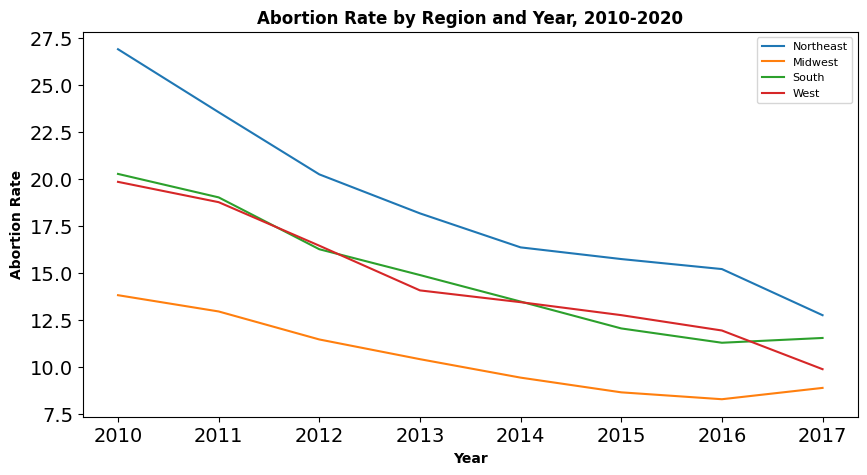

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/NationalAndStatePregnancy_PublicUse.csv")

# Define the regions
regions = {
    "Northeast": ["ME", "NH", "VT", "MA", "RI", "CT", "NY", "PA", "NJ"],
    "Midwest": ["OH", "MI", "IN", "IL", "WI", "MN", "IA", "MO", "ND", "SD", "NE", "KS"],
    "South": ["DE", "MD", "VA", "WV", "KY", "TN", "NC", "SC", "GA", "AL", "MS", "AR", "LA", "TX", "OK", "FL"],
    "West": ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "CO", "AZ", "NM"]
}

# Filter the data for the age group of 18-29 years old and the years from 2010 to 2020
df_filtered = df[(df["year"] >= 2010) & (df["year"] <= 2020) & (df["pregnancyrate1819"].notnull()) & (df["abortionrate1819"].notnull())]

# Pivot the data so that the regions are columns and the years are rows
df_pivot = pd.DataFrame(index=df_filtered["year"].unique())
for region, state_list in regions.items():
    df_pivot[region] = df_filtered[df_filtered["state"].isin(state_list)].groupby("year")["abortionrate1819"].mean()

# Create a time series chart for the abortion rate by region and year
fig, ax = plt.subplots(figsize=(10, 5))
for col in df_pivot.columns:
    df_pivot[col].plot(ax=ax, label=col)

# Set the x-axis label
ax.set_xlabel ("Year", fontsize=10, fontweight='bold')

# Set the y-axis label
ax.set_ylabel("Abortion Rate", fontsize=10, fontweight = 'bold')

# Set the title of the graph
ax.set_title("Abortion Rate by Region and Year, 2010-2020", fontsize=12, fontweight='bold')

# Add a legend
ax.legend(fontsize=8)
#Northeast is interesting because the rate of abortion was the highest out of all of the regions a sharp decline.
#The Midwest is also interesting because that number is really low in 2017.
#Could be the decline in pregnancy rate.

<Axes: xlabel='Region'>

Text(0.5, 1.0, 'Abortion Rates by Region in 2020')

Text(0.5, 0, 'Region')

Text(0, 0.5, 'Abortion Rate (%)')

Text(0, 21.7, '21.2')

Text(1, 11.7, '11.2')

Text(2, 13.4, '12.9')

Text(3, 15.4, '14.9')

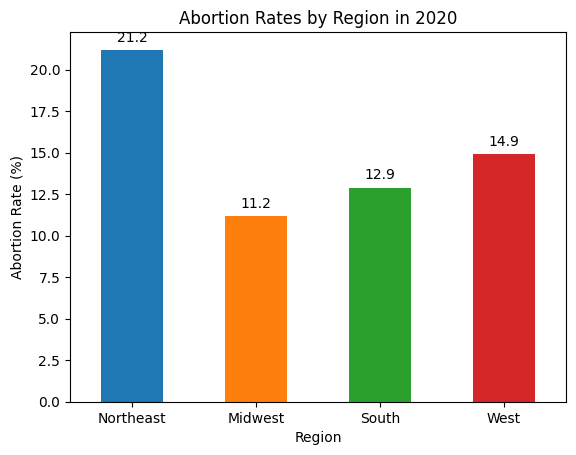

In [ ]:
# data for the chart
data = {'Region': ['Northeast', 'Midwest', 'South', 'West'],
        'Abortion Rate': [21.2, 11.2, 12.9, 14.9]}

# create a pandas dataframe from the data
abortion_rates = pd.DataFrame(data)

# define colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# bar chart with custom colors
abortion_rates.plot.bar(x='Region', y='Abortion Rate', rot=0, legend=None, color=colors)

# set the chart title and axis labels
plt.title('Abortion Rates by Region in 2020')
plt.xlabel('Region')
plt.ylabel('Abortion Rate (%)')

# labels for the values on top of the bars
for i, v in enumerate(abortion_rates['Abortion Rate']):
    plt.text(i, v + 0.5, str(v), ha='center')
#This graph shows something interesting - Abortion rates are still the highest for the Northeast.
#If one was to look at this graph alone without the first graph,it would show something different.
#This makes it seem as if abortion is really high in the Northeast when the rate is on the decline.

<BarContainer object of 56 artists>

Text(0.5, 0, 'Abortion rate (%)')

Text(0, 0.5, 'State')

Text(0.5, 1.0, 'Out of State Abortion Rate - 2020')

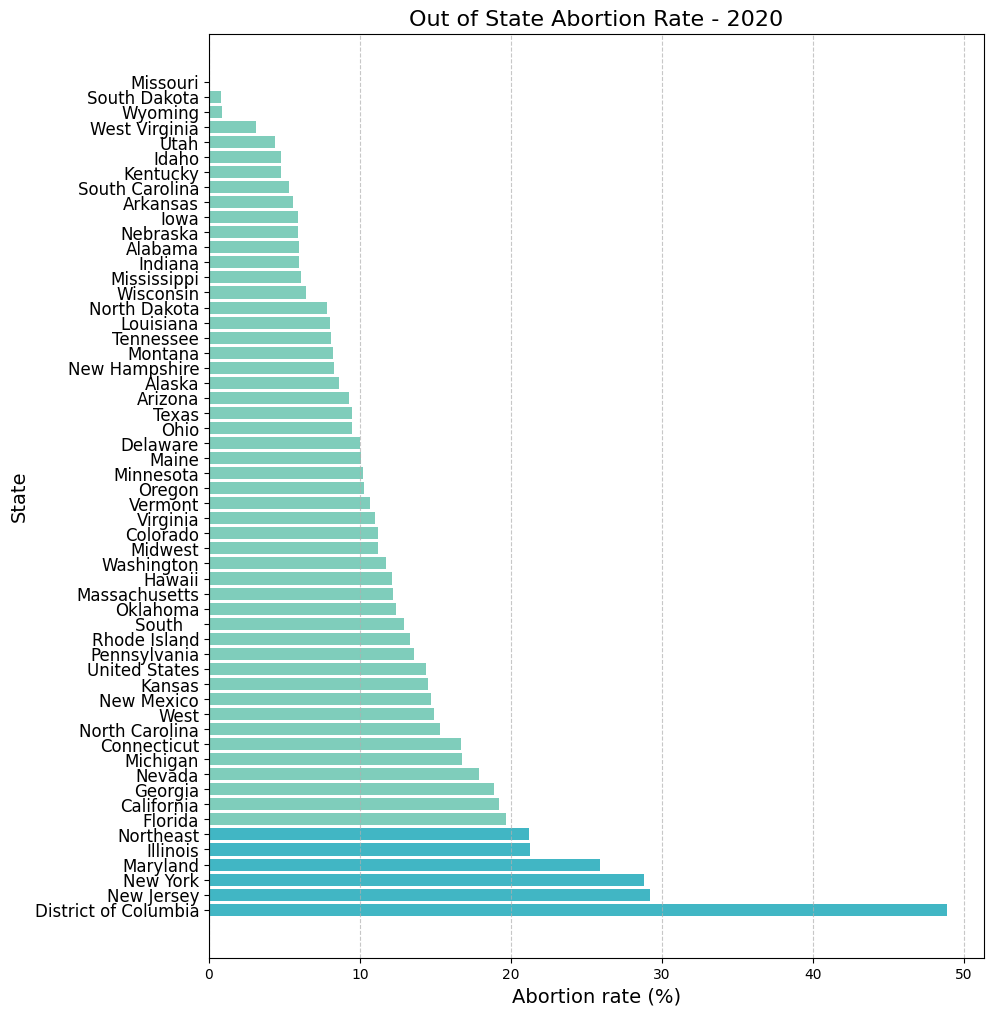

In [ ]:
# create a pandas DataFrame with the relevant columns
abortionmerge = pd.DataFrame({
    'State': abortionCen['State'],
    'Abortion rate (%)': abortionCen['Abortion rate among women aged 15-44 (2020)']
})

# drop any rows with missing data
abortionmerge = abortionmerge.dropna()

# sort the data by descending order of abortion rate
abortionmerge = abortionmerge.sort_values(by='Abortion rate (%)', ascending=False)

# create a horizontal bar chart with customizations
fig, ax = plt.subplots(figsize=(10, 12))

# set color for the bars
colors = ['#7fcdbb' if x < 20 else '#41b6c4' for x in abortionmerge['Abortion rate (%)']]

# plot the bars
ax.barh(abortionmerge['State'], abortionmerge['Abortion rate (%)'], color=colors)

# add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# set x-axis label, y-axis label, and title
ax.set_xlabel('Abortion rate (%)', fontsize=14)
ax.set_ylabel('State', fontsize=14)
ax.set_title('Out of State Abortion Rate - 2020', fontsize=16)

# set font size for y-axis tick labels
ax.tick_params(axis='y', labelsize=12)

#This is for out of state abortions.
#D.C data means that 70% of abortions conducted in the state were from out of state residents.
#CDC defines the data as: Abortions obtained by out of areas residents.
#Also, the data is by ppopulation so it would be out of all females (Per 1,000)

## Abortion Law Graphs - Pregnancy, Abortion,and Birth Rate

Text(0.5, 1.0, 'Pregnancy, Abortion, and Birth Rates in NJ, 1980-2017')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Rate per 1,000 women')

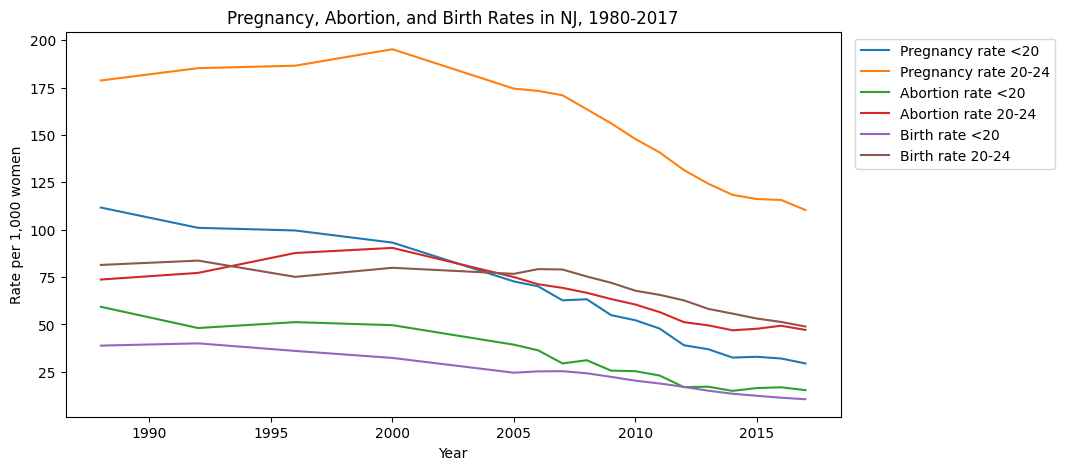

In [ ]:
# Read in the data
abortionpublic = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/NationalAndStatePregnancy_PublicUse.csv")

# Filter for data for NJ from 1980 to 2017
nj_data = abortionpublic[(abortionpublic.state == 'NJ') & (abortionpublic.year >= 1980) & (abortionpublic.year <= 2017)]

# Create a new dataframe with just the variables we want and rename columns
nj_rates = nj_data[['year', 'pregnancyratelt20', 'pregnancyrate2024', 'abortionratelt20', 'abortionrate2024', 'birthratelt20', 'birthrate2024']]
nj_rates = nj_rates.rename(columns={
    'pregnancyratelt20': 'Pregnancy rate <20',
    'pregnancyrate2024': 'Pregnancy rate 20-24',
    'abortionratelt20': 'Abortion rate <20',
    'abortionrate2024': 'Abortion rate 20-24',
    'birthratelt20': 'Birth rate <20',
    'birthrate2024': 'Birth rate 20-24'
})

# Set the year as the index
nj_rates.set_index('year', inplace=True)

# Plot the data
ax = nj_rates.plot(figsize=(10, 5))

# Add titles and labels
plt.title('Pregnancy, Abortion, and Birth Rates in NJ, 1980-2017')
plt.xlabel('Year')
plt.ylabel('Rate per 1,000 women')

# Move the legend to the top right
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

#This graph shows that there has been a reduction in both the pregnany rate, abortion rate, and bith rate.
#What is interesting about this graph is the decline in pregnancy rates for both age groups.
#This is the answer to that question (Yes, preganacy is on the decline).
#Lower abortion or just lower pregnancy?

In [ ]:
# Filter the data to only include the year 2017
df_2017 = abortionpublic[abortionpublic['year'] == 2017]

# Create the choropleth map
fig = px.choropleth(df_2017,
                    locations='state',
                    locationmode='USA-states',
                    color='pregnancyrate2024',
                    scope='usa',
                    hover_data={'state': False, 'pregnancyrate2024': ':.2f', 'abortionrate2024': ':.2f', 'birthrate2024': ':.2f'},
                    custom_data=['pregnancyrate2024', 'abortionrate2024', 'birthrate2024'])

# Update the title and font size, and add colorbar title
fig.update_layout(title={'text': 'Pregnancy, Abortion, and Birth Rates in the United States in 2017',
                          'y':0.95,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                  font={'size': 24},
                  coloraxis_colorbar={'title': 'Rate per 1,000 women'})
#According to Guttmacher, the preganacyrate2024 is no. of events per 1,000 women.

## Abortion Law Graphs-Pregnancy Rate vs Abortion Rate

In [ ]:
# Filter the data to only include the year 2017
df_2017 = abortionpublic[abortionpublic['year'] == 2017]

# Create the scatter plot
fig = px.scatter(df_2017,
                 x='pregnancyrate2024',
                 y='abortionrate2024',
                 size='birthrate2024',
                 color='state',
                 hover_name='state',
                 log_x=True,
                 log_y=True,
                 title='Pregnancy Rate Compared to the Abortion Rate in 2017')

# Update layout
fig.update_layout(title={'x': 0.5, 'y': 0.9, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title='Pregnancy Rate (per 1,000 women aged 20-24)',
                  yaxis_title='Abortion Rate (per 1,000 women aged 20-24)',
                  legend_title='State',
                  width=800, height=500)

#This graph shows the abortion rate prer 1,000 women between 20-25 for all states in the United States.

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Rate (per 1,000 women)')

Text(0.5, 1.0, 'Average Pregnancy Rate vs Abortion Rate for 18-29 Years Old, 2010-2020')

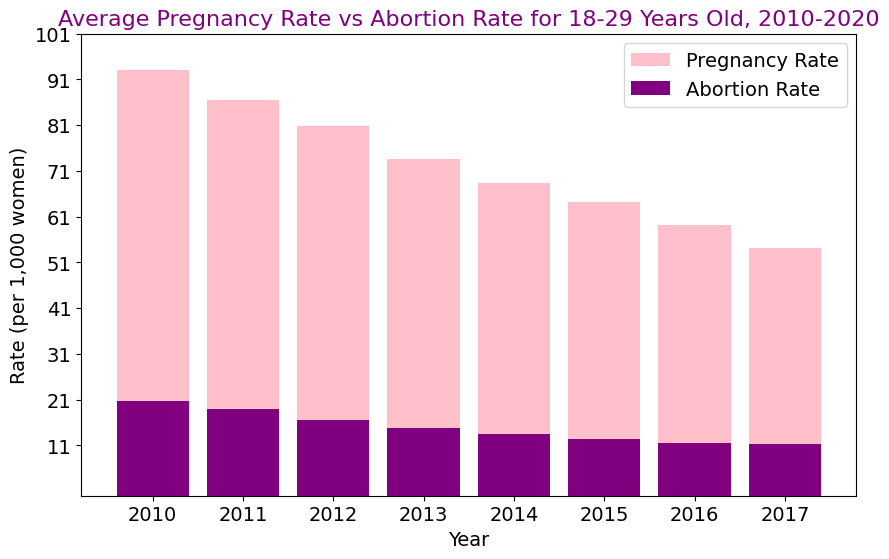

In [ ]:
# Load the data into a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/NationalAndStatePregnancy_PublicUse.csv")

# Filter the data for the age group of 18-29 years old and the years from 2010 to 2020
df_filtered = df[(df["year"] >= 2010) & (df["year"] <= 2020) & (df["pregnancyrate1819"].notnull()) & (df["abortionrate1819"].notnull())]

# Calculate the mean pregnancy rate and abortion rate for each year
df_mean = df_filtered.groupby("year")[["pregnancyrate1819", "abortionrate1819"]].mean().reset_index()

# Create a bar chart for the mean pregnancy rate and abortion rate for each year
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_mean["year"], df_mean["pregnancyrate1819"], label="Pregnancy Rate", color="pink")
ax.bar(df_mean["year"], df_mean["abortionrate1819"], label="Abortion Rate", color="purple")

# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Rate (per 1,000 women)")

# Set the y-axis tick marks
y_min = df_mean[["pregnancyrate1819", "abortionrate1819"]].min().min()
y_max = df_mean[["pregnancyrate1819", "abortionrate1819"]].max().max()
ax.set_yticks(range(int(y_min), int(y_max) + 10, 10))

# Set the title of the graph
ax.set_title("Average Pregnancy Rate vs Abortion Rate for 18-29 Years Old, 2010-2020", fontsize=16, color="purple")

# Add a legend
ax.legend()

#Graph is per 1,000 women.

Text(0.5, 0, 'Pregnancy Rate (per 1000 females aged 20-24)')

Text(0, 0.5, 'Abortion Rate (per 1000 females aged 20-24)')

Text(0.5, 1.0, 'Abortion Rate vs Pregnancy Rate (1972-2017)')

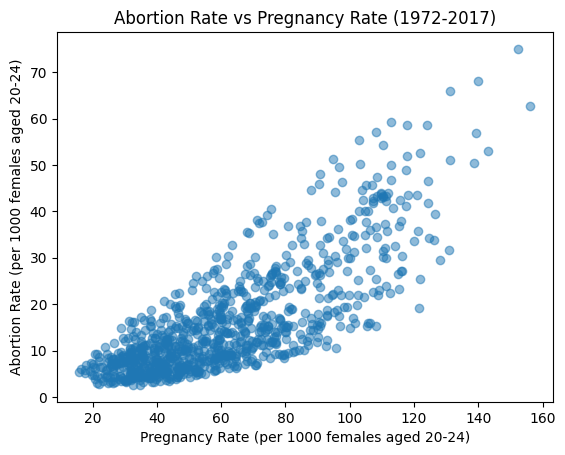

In [ ]:
# Load data
data = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/NationalAndStatePregnancy_PublicUse.csv")

# Filter data for years 1972 to 2017
data = data[(data['year'] >= 1972) & (data['year'] <= 2017)]

# Create scatter plot
plt.scatter(data['pregnancyrate1519'], data['abortionrate1519'], alpha=0.5)

# Set axis labels and title
plt.xlabel('Pregnancy Rate (per 1000 females aged 20-24)')
plt.ylabel('Abortion Rate (per 1000 females aged 20-24)')
plt.title('Abortion Rate vs Pregnancy Rate (1972-2017)')

## Abortion Law Graphs - Laws and Bans

Text(0.5, 0, 'Abortion ban by state')

Text(0.5, 1.0, 'Abortion rate among women aged 15-44 (2020) with respect to abortion ban')

[Text(0.0, 0, 'Ban exists'), Text(0.35, 0, 'No ban')]

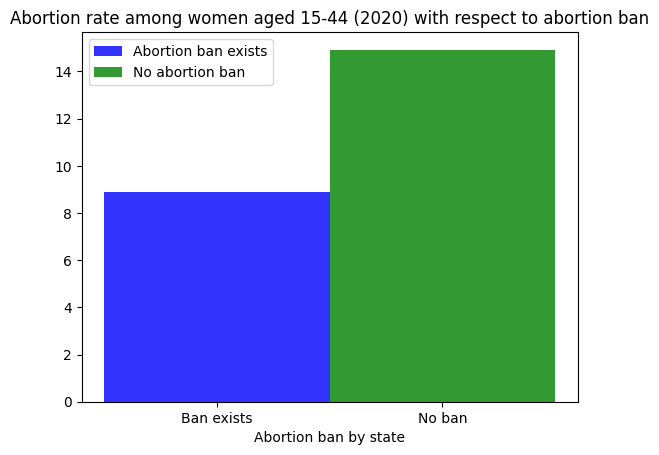

In [ ]:
# Data - abortion merge dataset
abortionmerge = pd.merge(abortionCen, abortionban, how='outer', on=['State'], indicator=True)

# Calculate the mean abortion rate for each group
banned_rate = np.mean(abortionmerge.loc[abortionmerge['_merge']=='both', 'Abortion rate among women aged 15-44 (2020)'])
not_banned_rate = np.mean(abortionmerge.loc[abortionmerge['_merge']=='left_only', 'Abortion rate among women aged 15-44 (2020)'])

# Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
rects1 = ax.bar(0, banned_rate, bar_width,
                alpha=opacity, color='b',
                label='Abortion ban exists')
rects2 = ax.bar(bar_width, not_banned_rate, bar_width,
                alpha=opacity, color='g',
                label='No abortion ban')

# Add labels, title, and legend
ax.set_xlabel('Abortion ban by state')
ax.set_title('Abortion rate among women aged 15-44 (2020) with respect to abortion ban')
ax.set_xticks([0, bar_width])
ax.set_xticklabels(['Ban exists', 'No ban'])
ax.legend()


#From this graph it looks like the states with the lowest percentages of abortion are the same states with abortion bans.

<Axes: ylabel='State'>

Text(0.5, 0, 'Number of Laws')

Text(0, 0.5, 'State')

Text(0.5, 1.0, 'Abortion Laws by State and Type')

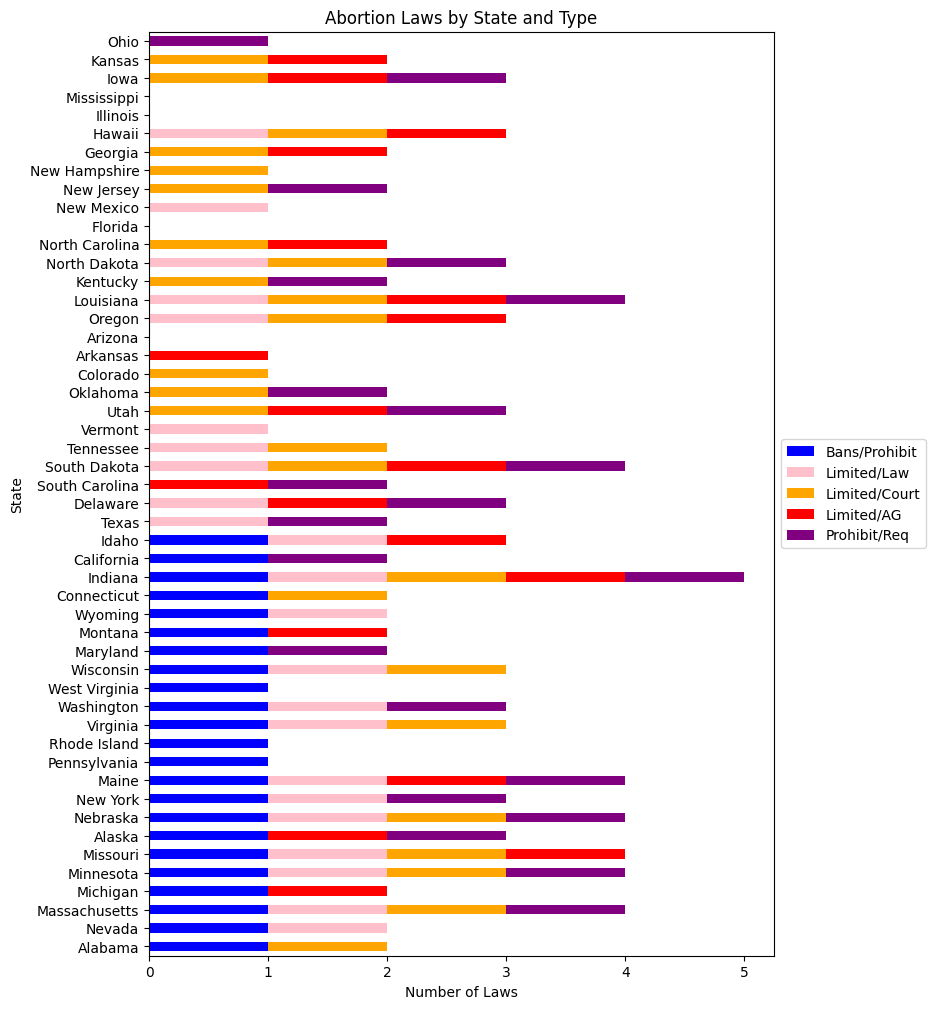

In [ ]:
# create a sample dataframe with random data for all 50 states
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
          'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
          'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
          'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
          'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
          'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

data = {
    'State': states,
    'Bans/Prohibit': np.random.randint(0, 2, 50),
    'Limited/Law': np.random.randint(0, 2, 50),
    'Limited/Court': np.random.randint(0, 2, 50),
    'Limited/AG': np.random.randint(0, 2, 50),
    'Prohibit/Req': np.random.randint(0, 2, 50)
}

df = pd.DataFrame(data)

# create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 12))
df.set_index('State', inplace=True)
df_sorted = df.sort_values(by='Bans/Prohibit', ascending=False)
df_sorted.plot(kind='barh', stacked=True, ax=ax, color=['blue', 'pink', 'orange', 'red', 'purple'])

# set axis labels and title
ax.set_xlabel('Number of Laws')
ax.set_ylabel('State')
ax.set_title('Abortion Laws by State and Type')

# create legend outside of plot and adjust plot size
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.subplots_adjust(right=0.75)

#Interesting that California has Limited_AG (limited by gestation weeks) but none of the other states do.

## Abortion Opinion Graphs

<ipython-input-79-54b78d3a75f1>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(-5.0, 0, 'Men'),
 Text(0.0, 0, 'Women '),
 Text(5.0, 0, '18-29'),
 Text(10.0, 0, '30-49'),
 Text(15.0, 0, '50-64'),
 Text(20.0, 0, '65 and older'),
 Text(25.0, 0, 'Non-Hispanic White '),
 Text(30.0, 0, 'People of Color ')]

Text(0.5, 0, 'Demogrpahics')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Pro-Choice vs. Pro-Life Attitudes 2022')

(0.0, 100.0)

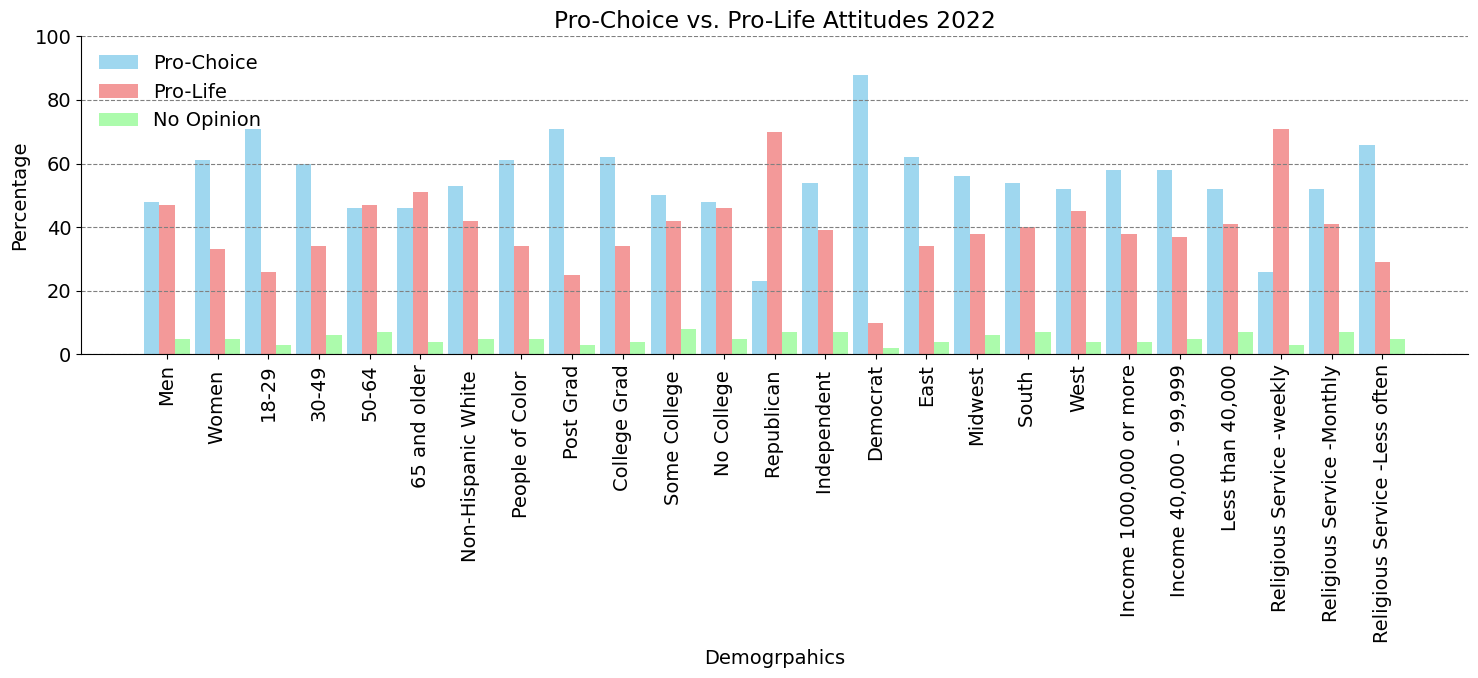

In [ ]:
# Load data
abortionDemographics = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion%20Data.csv")

# Create the bar graph
fig, ax = plt.subplots(figsize=(15, 7))
bar_width = 0.3
opacity = 0.8

bar1 = ax.bar([i - bar_width for i in np.arange(len(abortionDemographics))], abortionDemographics['Pro-Choice'], bar_width, alpha=opacity, color='skyblue', label='Pro-Choice')
bar2 = ax.bar([i for i in np.arange(len(abortionDemographics))], abortionDemographics['Pro-Life'], bar_width, alpha=opacity, color='lightcoral', label='Pro-Life')
bar3 = ax.bar([i + bar_width for i in np.arange(len(abortionDemographics))], abortionDemographics['No Opinion'], bar_width, alpha=opacity, color='palegreen', label='No Opinion')

ax.set_xticklabels(abortionDemographics['Demogrpahics'], rotation=90)
ax.set_xticks([i for i in np.arange(len(abortionDemographics))])
ax.set_xlabel(abortionDemographics.columns[0])
ax.set_ylabel('Percentage')
ax.set_title('Pro-Choice vs. Pro-Life Attitudes 2022')

ax.legend(loc='upper left', frameon=False)

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set y-axis range from 0 to 100
ax.set_ylim([0, 100])

# Add gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# Increase font size
plt.rcParams.update({'font.size': 14})

plt.tight_layout()

<ipython-input-80-4dde8ba353a1>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(-1.0, 0, 'Post Grad'),
 Text(-0.5, 0, 'College Grad'),
 Text(0.0, 0, 'Some College '),
 Text(0.5, 0, 'No College '),
 Text(1.0, 0, ''),
 Text(1.5, 0, ''),
 Text(2.0, 0, ''),
 Text(2.5, 0, ''),
 Text(3.0, 0, ''),
 Text(3.5, 0, ''),
 Text(4.0, 0, '')]

Text(0.5, 0, 'Educational Level')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Pro-Choice vs. Pro-Life Attitudes by Educational Level')

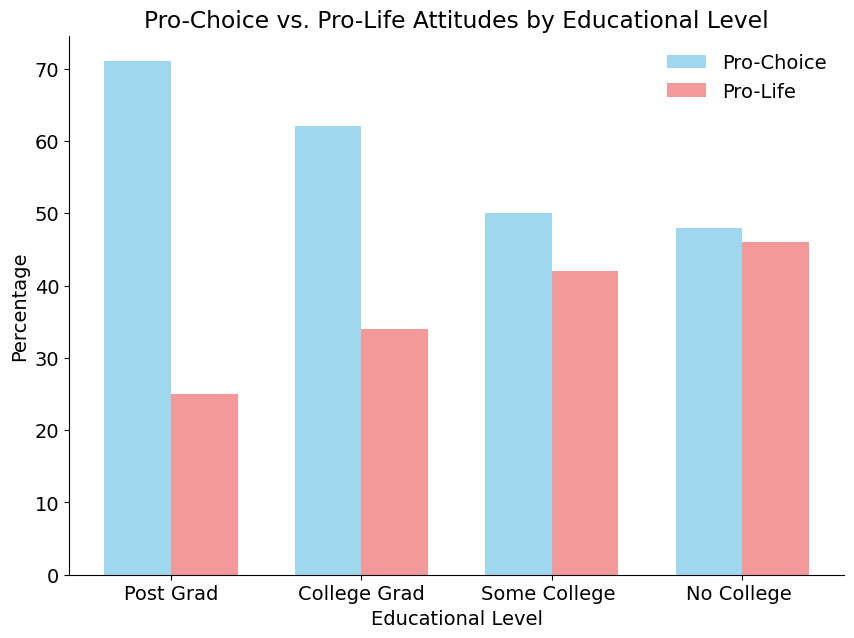

In [ ]:
# Grouped bar chart of Pro-Choice and Pro-Life attitudes by educational level

# Load data
abortionDemographics = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion%20Data.csv")

# Subset data to only include Pro-Choice and Pro-Life columns
edu_levels = ["Post Grad", "College Grad", "Some College ", "No College "]
edu_df = abortionDemographics[abortionDemographics["Demogrpahics"].isin(edu_levels)][["Demogrpahics", "Pro-Choice", "Pro-Life"]]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 7))
bar_width = 0.35
opacity = 0.8

bar1 = ax.bar([i - bar_width/2 for i in range(len(edu_df))], edu_df["Pro-Choice"], bar_width, alpha=opacity, color='skyblue', label='Pro-Choice')
bar2 = ax.bar([i + bar_width/2 for i in range(len(edu_df))], edu_df["Pro-Life"], bar_width, alpha=opacity, color='lightcoral', label='Pro-Life')

# Set axis labels and title
ax.set_xticklabels(edu_df["Demogrpahics"], rotation=0)
ax.set_xticks(range(len(edu_df)))
ax.set_xlabel("Educational Level")
ax.set_ylabel("Percentage")
ax.set_title("Pro-Choice vs. Pro-Life Attitudes by Educational Level")

# Add legend and remove top and right spines
ax.legend(loc='upper right', frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#Interesting that educational level is so correlated with opinions on abortions.

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Trends in Pro-Choice and Pro-Life Attitudes')

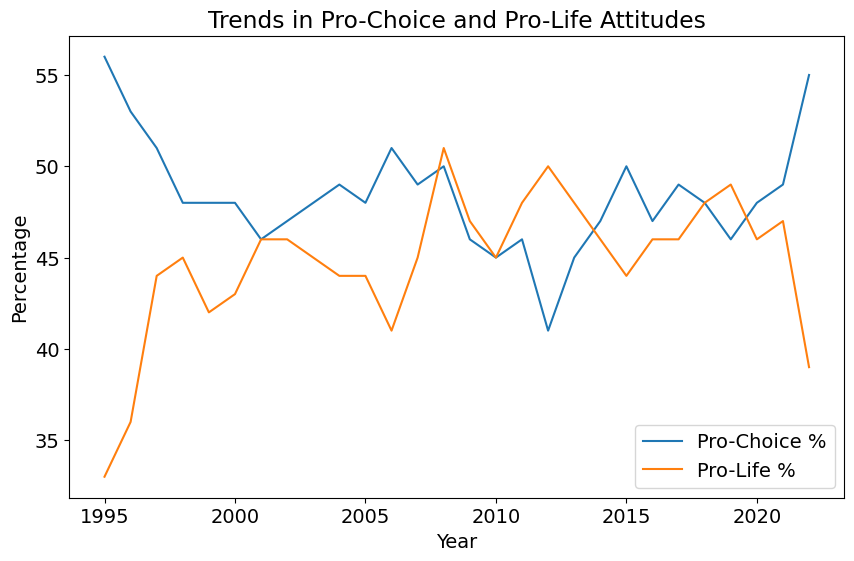

In [ ]:
# Load data
abortionDemographics = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Year%20and%20opinion_data.csv")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data as a line chart
ax.plot(abortionDemographics['Year '], abortionDemographics['Pro-Choice %'], label='Pro-Choice %')
ax.plot(abortionDemographics['Year '], abortionDemographics['Pro-Life %'], label='Pro-Life %')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Trends in Pro-Choice and Pro-Life Attitudes')

# Add a legend
ax.legend()

<Axes: xlabel='Year '>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Abortion Opinions by Year')

[Text(0, 0, '1995'),
 Text(1, 0, '2000'),
 Text(2, 0, '2005'),
 Text(3, 0, '2010'),
 Text(4, 0, '2015'),
 Text(5, 0, '2020'),
 Text(6, 0, '2022')]

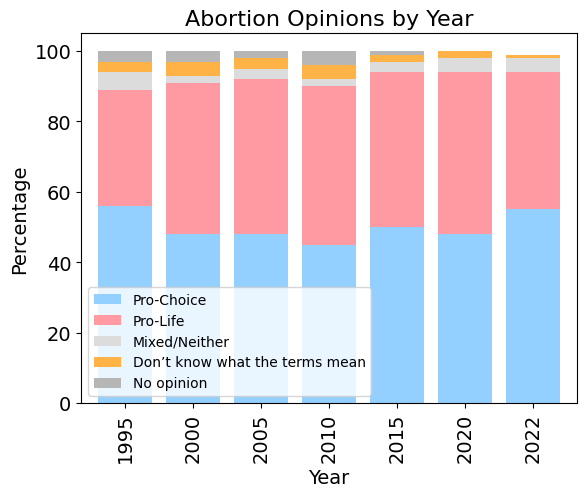

In [ ]:
# Load data
abortionDem1 = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Year%20and%20opinion_data.csv")

# Select the columns we need for the plot
data = abortionDem1[['Year ', 'Pro-Choice %', 'Pro-Life %', 'Mixed/Neither %', 'Don’t know what the terms mean %', 'No opinion']]

# Convert "Nah" to NaN (not a number)
data['No opinion'] = pd.to_numeric(data['No opinion'], errors='coerce')

# Set the year column as the index
data = data.set_index('Year ')

# Define colors for the bars
colors = ['#94d0ff', '#ff9aa2', '#dcdcdc', '#ffb347', '#b6b6b6']


# Select data for every 5 years
data = data.loc[[1995, 2000, 2005, 2010, 2015, 2020, 2022]]

# Plot
fig, ax = plt.subplots()
data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

# Axes labels and legend
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_title("Abortion Opinions by Year", fontsize=16)
ax.legend(['Pro-Choice', 'Pro-Life', 'Mixed/Neither', 'Don’t know what the terms mean', 'No opinion'], fontsize=10)

# Set tick positions and labels for the x-axis
ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.index)
#No opinion disapears
#Year 2010 is kinda odd, high pretty big perentage of no opinion. Why?

Text(0.5, 0, 'Abortion Stance')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Abortion Stance by Gender')

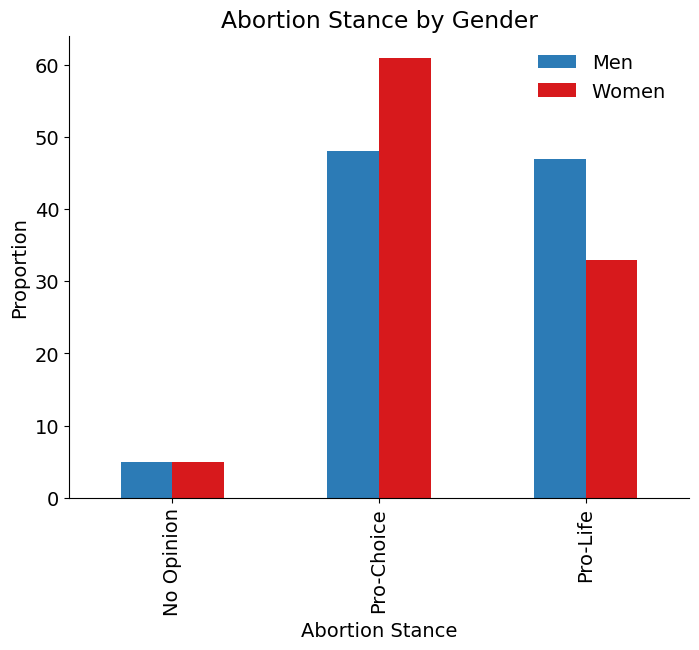

In [ ]:
# Load data
abortionDemographics = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Abortion%20Data.csv")

# Subset data to only include gender and abortion stance columns
gender_df = abortionDemographics[["Demogrpahics", "Pro-Choice", "Pro-Life", "No Opinion"]].iloc[:2]

# Melt the data to long format
gender_melt = gender_df.melt(id_vars=["Demogrpahics"], var_name="Abortion Stance", value_name="Proportion")

# Pivot the data to create the grouped bar chart
gender_pivot = gender_melt.pivot(index="Abortion Stance", columns="Demogrpahics", values="Proportion")

# Create the bar chart
ax = gender_pivot.plot(kind="bar", color=["#2C7BB6", "#D7191C", "#D3D3D3"], figsize=(8,6))

# Set axis labels and title
ax.set_xlabel("Abortion Stance")
ax.set_ylabel("Proportion")
ax.set_title("Abortion Stance by Gender")

# Add legend and remove top and right spines
ax.legend(frameon=False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#Gender is interesting.

In [ ]:
import pandas as pd

url = "https://github.com/Mmarlo5/psychic-doodle/raw/ae1bf752f661b33937e7ce92f6daaa6feff0e55f/CDC_USDATA_abortion%20(3).xlsx"

abortioncdc_abortion = pd.read_excel(url)
abortioncdc_abortion.head()


,STATE,<15,15-19,20-24,25-29,30-34,35-39,<40,Total Abortions
0,Alabama,21 (0.4),483 (8.5),"1,746 (30.6)","1,768 (31.0)","1,019 (17.9)",533 (9.3),137 (2.4),"5,707 (99.9)"
1,Alaska,7 (0.6),121 (10.0),361 (29.9),319 (26.5),238 (19.7),121 (10.0),39 (3.2),"1,206 (100.0)"
2,Arizona,24 (0.2),"1,202 (9.1)","4,033 (30.4)","3,656 (27.5)","2,519 (19.0)","1,371 (10.3)",468 (3.5),"13,273 (100.0)"
3,Arkansas,11 (0.3),293 (9.3),965 (30.6),961 (30.5),556 (17.7),279 (8.9),84 (2.7),"3,149 (99.8)"
4,Colorado,28 (0.3),929 (9.4),"2,897 (29.4)","2,812 (28.5)","1,890 (19.2)",953 (9.7),357 (3.6),"9,866 (100.0)"


In [26]:
abortioncdc_abortion.rename(columns={'&lt;15': '0-15'}, inplace=True)

In [27]:
print(abortioncdc_abortion.head())

      STATE       <15        15-19         20-24         25-29         30-34  \
0   Alabama  21 (0.4)    483 (8.5)  1,746 (30.6)  1,768 (31.0)  1,019 (17.9)   
1    Alaska   7 (0.6)   121 (10.0)    361 (29.9)    319 (26.5)    238 (19.7)   
2   Arizona  24 (0.2)  1,202 (9.1)  4,033 (30.4)  3,656 (27.5)  2,519 (19.0)   
3  Arkansas  11 (0.3)    293 (9.3)    965 (30.6)    961 (30.5)    556 (17.7)   
4  Colorado  28 (0.3)    929 (9.4)  2,897 (29.4)  2,812 (28.5)  1,890 (19.2)   

          35-39        <40 Total Abortions  
0     533 (9.3)  137 (2.4)    5,707 (99.9)  
1    121 (10.0)   39 (3.2)   1,206 (100.0)  
2  1,371 (10.3)  468 (3.5)  13,273 (100.0)  
3     279 (8.9)   84 (2.7)    3,149 (99.8)  
4     953 (9.7)  357 (3.6)   9,866 (100.0)  


In [38]:
abortionOpinion4 = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Opinion-state.csv")
abortionOpinion4.head()

,State,Legal in all/most cases,Illegal in all/most cases,Don't know,Sample size
0,Alabama,37%,58%,4%,511
1,Alaska,63%,34%,3%,310
2,Arizona,49%,46%,4%,653
3,Arkansas,38%,60%,2%,311
4,California,57%,38%,5%,"3,697"


In [39]:
abortionOpinion4 =abortionOpinion4.rename(columns = {'Don&#39;t know what terms mean (vol.)': 'Dont know'})
abortionOpinion4.head()

,State,Legal in all/most cases,Illegal in all/most cases,Don't know,Sample size
0,Alabama,37%,58%,4%,511
1,Alaska,63%,34%,3%,310
2,Arizona,49%,46%,4%,653
3,Arkansas,38%,60%,2%,311
4,California,57%,38%,5%,"3,697"


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_18, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_19, *['State'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_20, *['Legal in all/most cases'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_21, *['Illegal in all/most cases'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_22, *["Don't know"], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_23, *['index', 'count()', 'State'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['index', 'count()', 'Legal in all/most cases'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['index', 'count()', 'Illegal in all/most cases'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_26, *['index', 'count()', "Don't know"], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_27, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_28, *['State', 'Legal in all/most cases'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_29, *['Legal in all/most cases', 'Illegal in all/most cases'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_30, *['Illegal in all/most cases', "Don't know"], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_31, *["Don't know", 'Sample size'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_32, *['index', 'State'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_33, *['index', 'Legal in all/most cases'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_34, *['index', 'Illegal in all/most cases'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_35, *['index', "Don't know"], **{'inner': 'stick'})
chart

In [46]:
import pandas as pd

url = "https://github.com/Mmarlo5/psychic-doodle/raw/ae1bf752f661b33937e7ce92f6daaa6feff0e55f/CDC_USDATA_abortion%20(3).xlsx"

abortioncdc_abortion = pd.read_excel(url)
abortioncdc_abortion.head()

# Save the data to a CSV file
abortioncdc_abortion.to_csv("abortion_data.csv", index=False)


,STATE,<15,15-19,20-24,25-29,30-34,35-39,<40,Total Abortions
0,Alabama,21 (0.4),483 (8.5),"1,746 (30.6)","1,768 (31.0)","1,019 (17.9)",533 (9.3),137 (2.4),"5,707 (99.9)"
1,Alaska,7 (0.6),121 (10.0),361 (29.9),319 (26.5),238 (19.7),121 (10.0),39 (3.2),"1,206 (100.0)"
2,Arizona,24 (0.2),"1,202 (9.1)","4,033 (30.4)","3,656 (27.5)","2,519 (19.0)","1,371 (10.3)",468 (3.5),"13,273 (100.0)"
3,Arkansas,11 (0.3),293 (9.3),965 (30.6),961 (30.5),556 (17.7),279 (8.9),84 (2.7),"3,149 (99.8)"
4,Colorado,28 (0.3),929 (9.4),"2,897 (29.4)","2,812 (28.5)","1,890 (19.2)",953 (9.7),357 (3.6),"9,866 (100.0)"


In [49]:
data.dtypes



STATE              object
<15                object
15-19              object
20-24              object
25-29              object
30-34              object
35-39              object
<40                object
Total Abortions    object
dtype: object